In [11]:
import numpy as np
from collections import defaultdict
import os
from os.path import join 
import time
import pandas as pd
import glob
from tqdm import tqdm
from utils import matplotlib_setup
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

ModuleNotFoundError: No module named 'utils'

In [9]:
def read_data(dataroot,file_ending='*Meter.csv'):
    fields = ['Flow ID','Tot Fwd Pkts','Tot Bwd Pkts','Label','Timestamp']
    
    print(join(dataroot,file_ending))
    filenames = [i for i in glob.glob(join(dataroot,file_ending))]
    
    df_list = []
    for filename in tqdm(filenames):
        df = pd.read_csv(filename,dtype=object,usecols=fields)        
        df_list.append(df)
    combined_csv = pd.concat(df_list,sort=False)
    combined_csv['Day'] = combined_csv['Timestamp'].map(lambda x: x[:2]).astype(str) # type string
    combined_csv['flow_length']=(combined_csv['Tot Fwd Pkts'].astype(float)+combined_csv['Tot Bwd Pkts'].astype(float))
    combined_csv.drop(columns=['Tot Fwd Pkts','Tot Bwd Pkts'])
    return combined_csv

In [12]:
def matplotlib_setup(fontsize=45):
    font = {'size'   : fontsize}
    plt.rc('font', **font)
    plt.rcParams["axes.linewidth"]  = 2.5
    plt.grid(linewidth=3,axis='y', color='grey')

    CB91_Blue = '#2CBDFE'
    CB91_Green = '#47DBCD'
    CB91_Pink = '#F3A0F2'
    CB91_Purple = '#9D2EC5'
    CB91_Violet = '#661D98'
    CB91_Amber = '#F5B14C'
    color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]

    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
    return plt


In [5]:
dataroot = '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/WS_l'
#dataroot = '/data/juma/data/ids18/CSVs_r_1.0/SR_10/RPS_SI_10_l'
data= read_data(dataroot)

/data/juma/data/ids18/CSVs_r_1.0_m_1.0/WS_l/*Meter.csv


In [6]:
gdata = data.groupby(['Flow ID','Day','Label'],as_index=False).sum()

print("#flowRecords vs #flows {} vs. {}",data.shape[0],gdata.shape[0])
   

step=0.05
indices = np.arange(0,1+step,step)
grouping_by_label = gdata.groupby(['Label'])
labels = gdata.Label.unique()
##flowRecords vs #flows {} vs. {} 94536412 34446318

#flowRecords vs #flows {} vs. {} 92151550 47016496


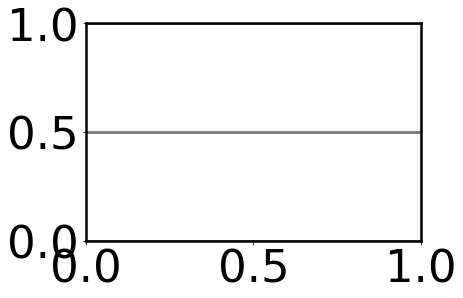

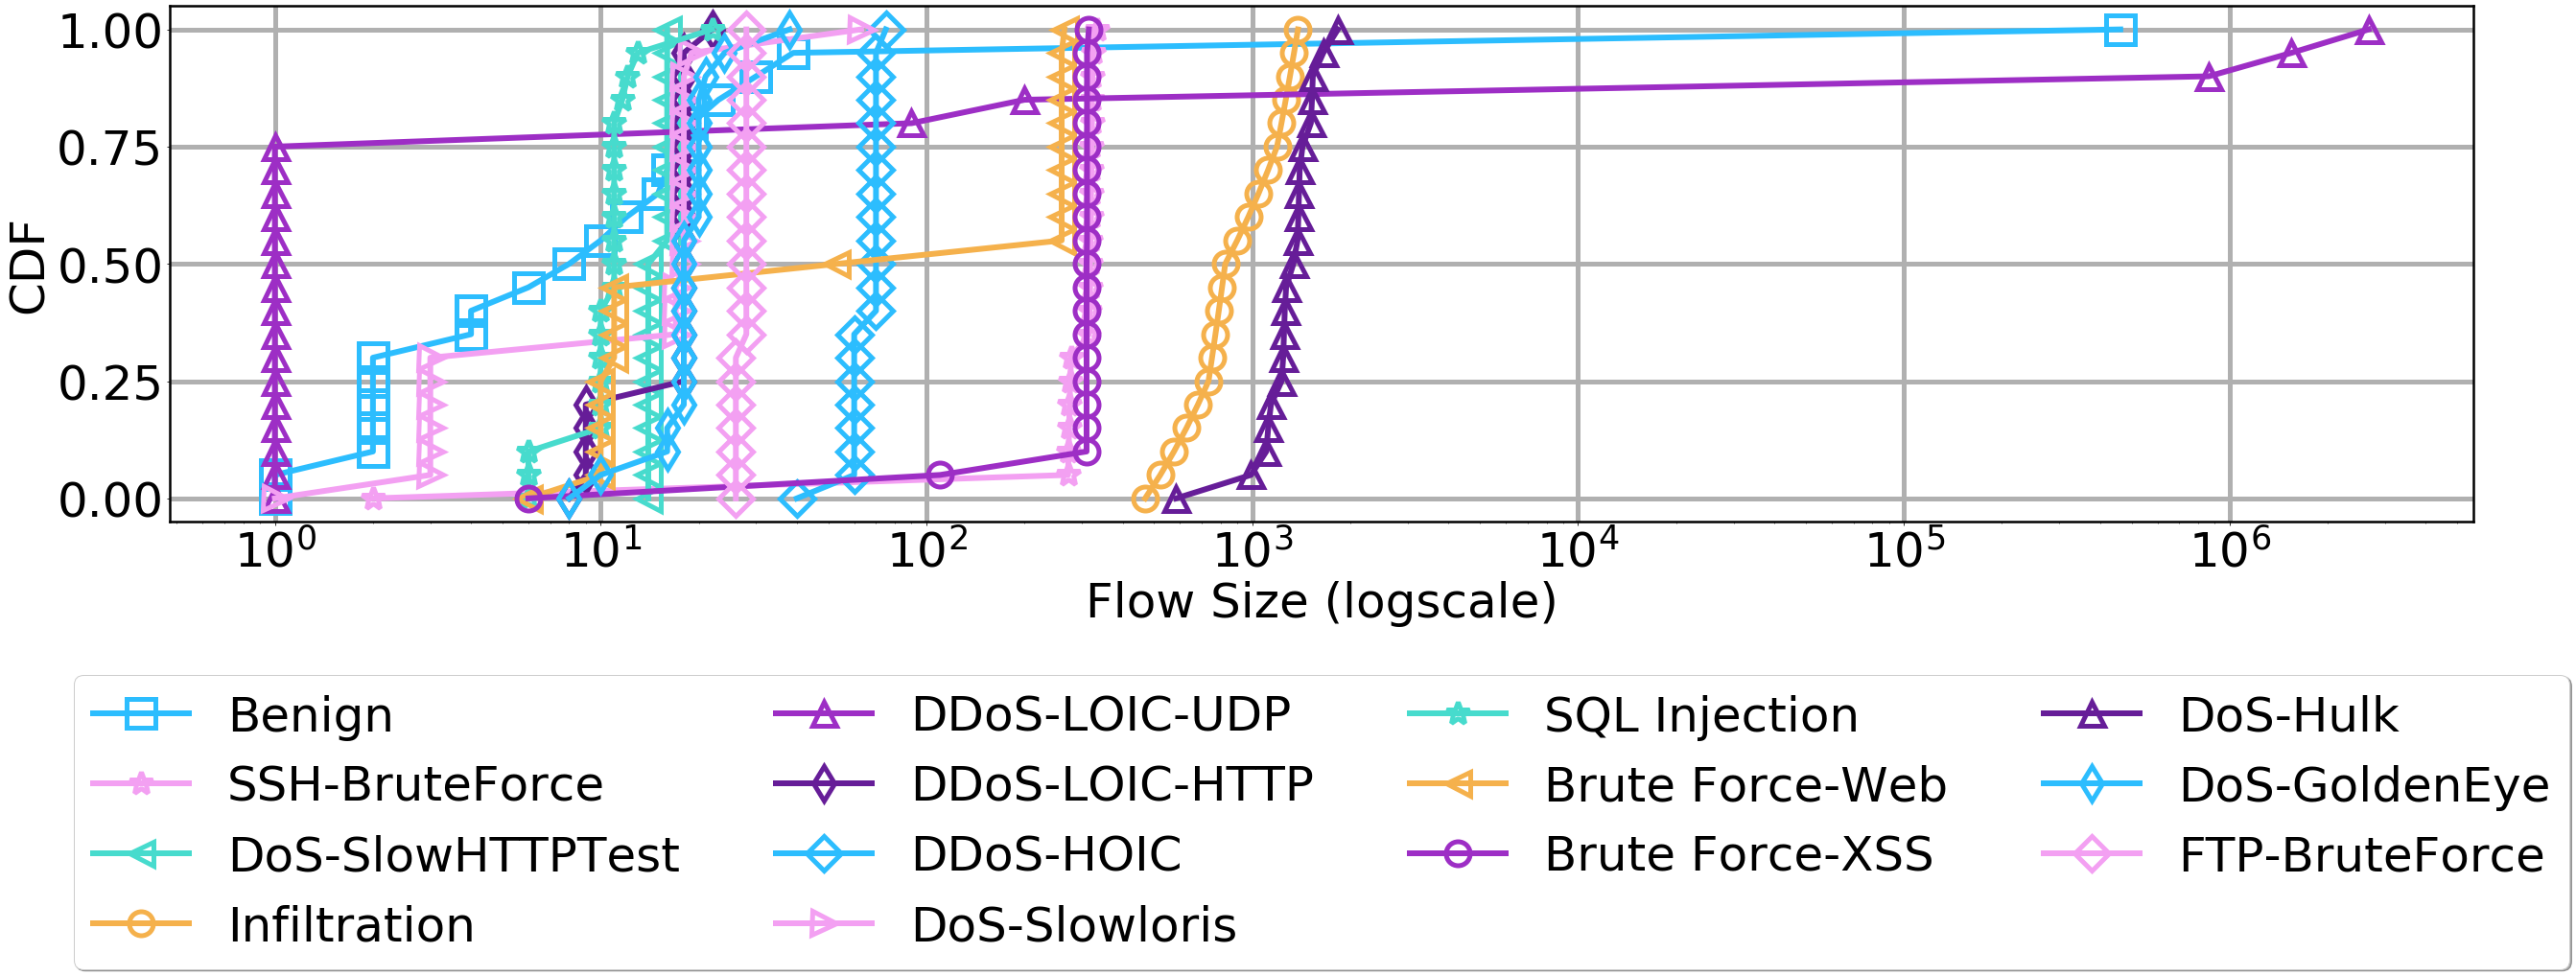

In [17]:

#drawing
matplotlib_setup()
font = {'size'   : 50}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(40,15))
markers = ['s','*','<','o','^','d','D','>','*','<','o','^','d','D']
for i,label in enumerate(labels):
    quantile = grouping_by_label.get_group(label)['flow_length'].quantile(indices)
    if label=='Benign':
        msize= 30
    else:
        msize = 25
    plt.plot(quantile,indices,label=label,linewidth=6,marker=markers[i],markersize=msize,markeredgewidth=5,markerfacecolor='none')


plt.xscale('log')
plt.xlabel('Flow Size (logscale)')
plt.ylabel('CDF')
#plt.ylim(0,3.5)
plt.ylim()
plt.grid(linewidth=5)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True, ncol=4)
fig.tight_layout()
plt.savefig(join(dataroot,'flow_length_percentile.png'),dpi=100)
plt.show()
